 User ID  Degree  Weighted Degree  PageRank  Betweenness Centrality
       1      14            45088  0.047319                0.002750
       2      10            23926  0.035899                0.000000
       3      14            45288  0.047319                0.002750
       4      17            63822  0.056212                0.016313
       5      18            70365  0.059319                0.026162
       6      14            45054  0.047319                0.002750
       7      14            45053  0.047319                0.002750
       8      14            45021  0.047319                0.002750
       9      18            79019  0.059517                0.028873
      10      10            60894  0.036434                0.001667
      11      13            72218  0.045019                0.006431
      12      18            79230  0.059517                0.028873
      13      13            72214  0.045019                0.006431
      14      18            79023  0.059517     

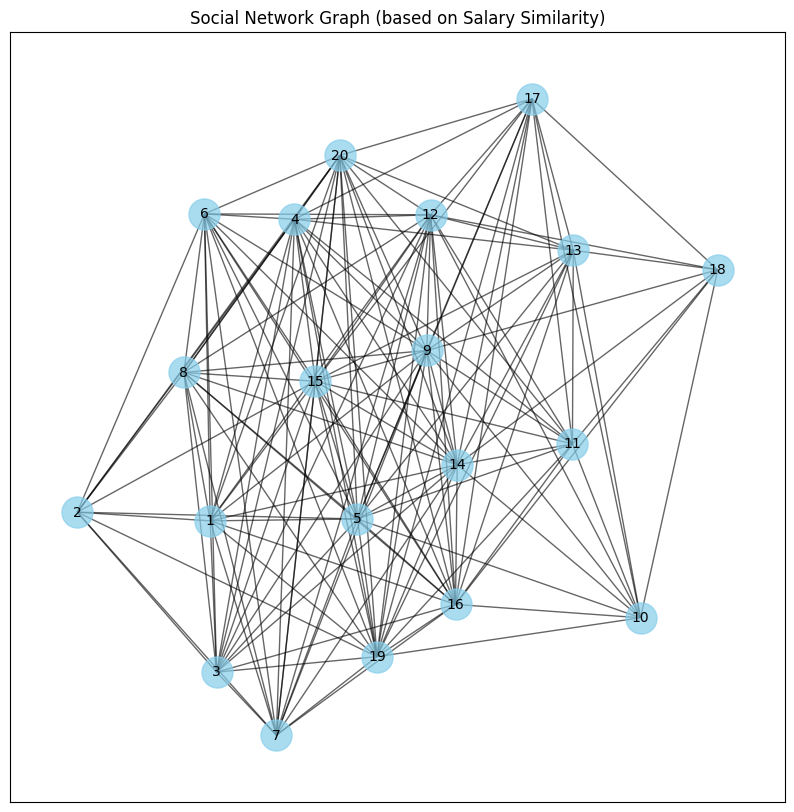

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
file_path = 'C:/Users/Yashraj/Downloads/salary.csv'
df = pd.read_csv(file_path)

# Create the graph
G = nx.Graph()

# Add nodes with 'User ID' and 'Salary' attributes
for _, row in df.iterrows():
    G.add_node(row['userid'], salary=row['salary'])

# Adding edges based on salary similarity (±5000 units)
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if abs(df['salary'].iloc[i] - df['salary'].iloc[j]) <= 5000:
            G.add_edge(df['userid'].iloc[i], df['userid'].iloc[j])

# Compute metrics
degree_dict = dict(G.degree())
weighted_degree_dict = {
    node: sum(G.nodes[neighbor]['salary'] for neighbor in G.neighbors(node))
    for node in G.nodes
}
pagerank_dict = nx.pagerank(G)
betweenness_centrality_dict = nx.betweenness_centrality(G)

# Convert results to DataFrames
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['Degree'])
weighted_degree_df = pd.DataFrame.from_dict(weighted_degree_dict, orient='index', columns=['Weighted Degree'])
pagerank_df = pd.DataFrame.from_dict(pagerank_dict, orient='index', columns=['PageRank'])
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality_dict, orient='index', columns=['Betweenness Centrality'])

# Combine all metrics into a single DataFrame
metrics_df = degree_df.join(weighted_degree_df).join(pagerank_df).join(betweenness_df)

# Reset index for better presentation
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'User ID'}, inplace=True)

# Print the combined DataFrame
print(metrics_df.to_string(index=False))

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.6)
nx.draw_networkx_labels(G, pos, labels={node: str(node) for node in G.nodes()}, font_size=10)
plt.title('Social Network Graph (based on Salary Similarity)')
plt.show()
